In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('flavors_of_cacao.csv')

In [20]:
# Understanding the basic ground information of my data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())


In [21]:
all_about_my_data(df)

Here is some Basic Ground Info about your Data:

Number of Instances: 1795
Number of Features: 9

Summary Stats:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000
75%    1502.000000   2015.000000     3.500000
max    1952.000000   2017.000000     5.000000

Missing Values:
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64


In [22]:
try :
    df['Review Date'].head()
except:
    print('An error occurred')
    

An error occurred


In [32]:
cols = list(df.columns)

def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat

print("Feature Names before Cleaning:")
print(cols)
print("\nFeature Names after Cleaning:")
print(rec_features(cols))

Feature Names before Cleaning:
['company', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Feature Names after Cleaning:
['company', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


In [33]:
new_feature_names = rec_features(cols)
new_feature_names[0] = 'company'

df = df.rename(columns = dict(zip(df.columns, new_feature_names)))
df.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                        object
company_location                     object
rating                              float64
bean_type                            object
broad_bean_origin                    object
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [35]:
df[['bean_type', 'broad_bean_origin']].head()

,bean_type,broad_bean_origin
0,,Sao Tome
1,,Togo
2,,Togo
3,,Togo
4,,Peru


In [36]:
df['bean_type'].value_counts().head()


bean_type
                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: count, dtype: int64

In [38]:
list(df['bean_type'][0:10])

['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

In [39]:
def repl_spaces(x):
    if (x is "\xa0"):
        return "NONE"

df['bean_type'] = df['bean_type'].apply(repl_spaces)
df.head()

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_17435/781438210.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (x is "\xa0"):


,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NONE,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NONE,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NONE,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NONE,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NONE,Peru


In [40]:
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%', '').astype(float)/100
df.head()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NONE,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NONE,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NONE,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NONE,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NONE,Peru


In [41]:
d5 = df.groupby('review_date').agg({'cocoa_percent':'mean'})
d5 = d5.reset_index()

d5

,review_date,cocoa_percent
0,2006,0.710000
1,2007,0.720390
2,2008,0.726989
3,2009,0.704431
4,2010,0.707793
5,2011,0.709697
6,2012,0.715282
7,2013,0.722663
8,2014,0.722530
9,2015,0.720140


/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


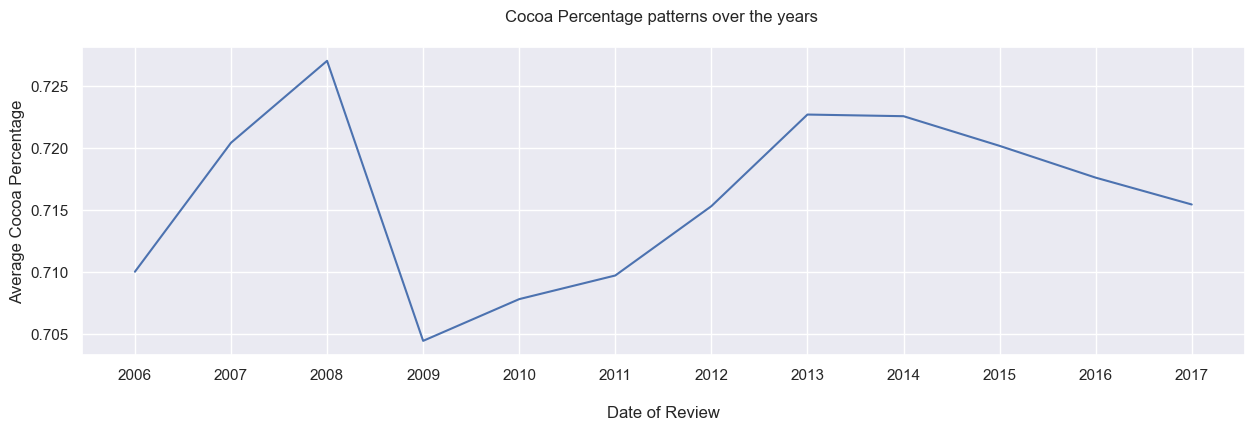

In [43]:
# sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=d5)
ax.set(xticks=d5.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()